In [5]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../../data/dataset_metadata.csv")

In [7]:
data.columns

Index(['Current location', 'Filename', 'Type', 'Probe', 'Date added',
       'URL (Video Name)', 'DOI', 'Comments from web site', 'Title',
       'Comments first medical doctor (MD1)', 'MD2', 'MD3', 'Framerate',
       'Resolution', 'Length (frames)', 'Lung /abdomen interface',
       'Patient ID / Name', 'Gender', 'Age', 'Area according to DEGUM',
       'Unnamed: 20', 'effusion', 'consolidated', 'B-lines', 'A-lines',
       'irregularities / thickening around pleural line', 'air bronchogram',
       'healthy'],
      dtype='object')

In [8]:
# effusion, consolidated, blines, alines, irregular = [], [], [], []
found_pattern = np.array(["(sub)pleural effusion", "consolidation", "B-line(s)", "A-lines", "irregular pleural line", "air bronchogram", "normal"])
pathologies = np.zeros((len(data), 7))
pat_dict = [["effusion"], ["consol"], ["b line", "b-line", "b - line"], ["a line", "a-line", "a - line"], 
            ["pleural irregular", "irregular pleural", "pleural thickening"], ["bronchogram"],
            ["normal", "healthy"]]

for i, row in data.iterrows():
    if "artifacts" in row["Current location"] or "uncertain" in row["Current location"]:
        print("ueberspringe", row["Filename"])
        continue
    all_comments = (str(row['Comments first medical doctor (MD1)']) + " " +  str(row['MD2'])).lower()
    # Effusion?
    for pat_ind in range(7):
        for pat in pat_dict[pat_ind]:
            if (not "no "+pat in all_comments) and (not "not "+ pat in all_comments) and pat in all_comments:
                pathologies[i,pat_ind] = 1
    # print(str(row['Comments first medical doctor (MD1)'])+ " " + str(row['MD2']))
    one_pathologies = np.where(pathologies[i]>0)[0]
    print(found_pattern[one_pathologies])
    # print()
    if (row["Filename"]).lower()[:3]=="reg" and ("effusion" in all_comments or "consol" in all_comments or "pleural irregular" in all_comments):
        print(row["Filename"].lower())
    

['(sub)pleural effusion' 'B-line(s)' 'irregular pleural line']
['consolidation' 'B-line(s)' 'A-lines' 'irregular pleural line']
['B-line(s)']
['consolidation']
['irregular pleural line']
['(sub)pleural effusion' 'consolidation' 'B-line(s)']
['(sub)pleural effusion' 'consolidation' 'irregular pleural line']
['B-line(s)']
['(sub)pleural effusion' 'B-line(s)']
['(sub)pleural effusion' 'B-line(s)']
['consolidation']
['(sub)pleural effusion' 'B-line(s)' 'irregular pleural line']
['(sub)pleural effusion' 'consolidation' 'B-line(s)']
['(sub)pleural effusion' 'consolidation']
['consolidation']
['consolidation']
['consolidation']
['consolidation']
[]
[]
['consolidation' 'normal']
[]
['consolidation']
['normal']
['normal']
[]
['A-lines' 'normal']
['normal']
['B-line(s)' 'normal']
['B-line(s)' 'irregular pleural line']
['consolidation' 'normal']
['(sub)pleural effusion' 'consolidation']
['B-line(s)']
['consolidation']
['consolidation']
['consolidation']
['A-lines' 'normal']
[]
['normal']
['normal

In [11]:
mddf = pd.DataFrame(pathologies.astype(int), columns = found_pattern)

In [12]:
mddf.to_csv("../../data/pathologies.csv")

In [48]:
def filter_fn(fn):
    if fn.lower() in ["reg", "cov", "pne", "vir"]:
        return fn.lower()
    else:
        print(fn)
        return "reg" # all wrong ones are reg write now
label = [filter_fn(fn[:3]) for fn in data["Filename"].values] #  if fn[:3] in ["Reg", "reg", "Cov", "cov", "pne", "Pne"]]

rec
rec
rec


In [49]:
mddf["label"] = label

In [50]:
overview = mddf.groupby("label").aggregate("mean")

In [43]:
overview.index[1]

'pne'

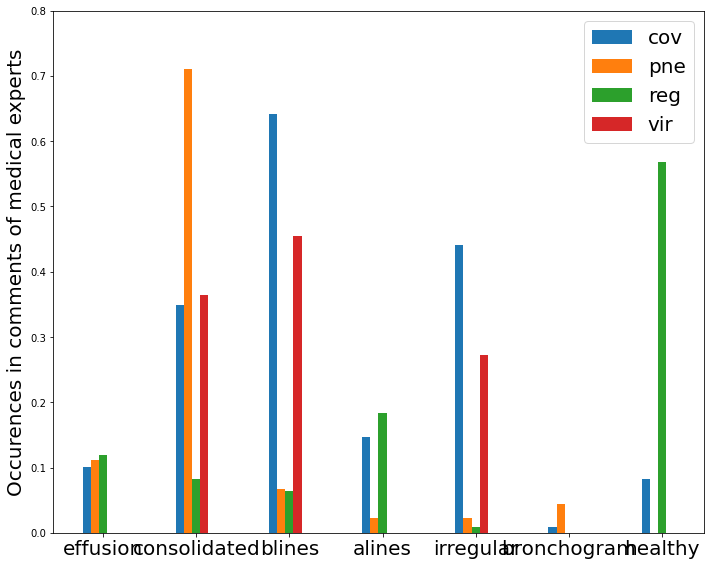

In [92]:
x = np.arange(len(overview.columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))

rects = list()
for i in range(4):
    rect = ax.bar(x - width/2 + i*width/4, overview.iloc[i].values, width/4, label=overview.index[i])
    rects.append(rect)
# rects2 = ax.bar(x + width/4, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Occurences in comments of medical experts', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(found_pattern, fontsize=20)
ax.legend(fontsize=20)
ax.set_ylim(0,0.8)

fig.tight_layout()

plt.show()

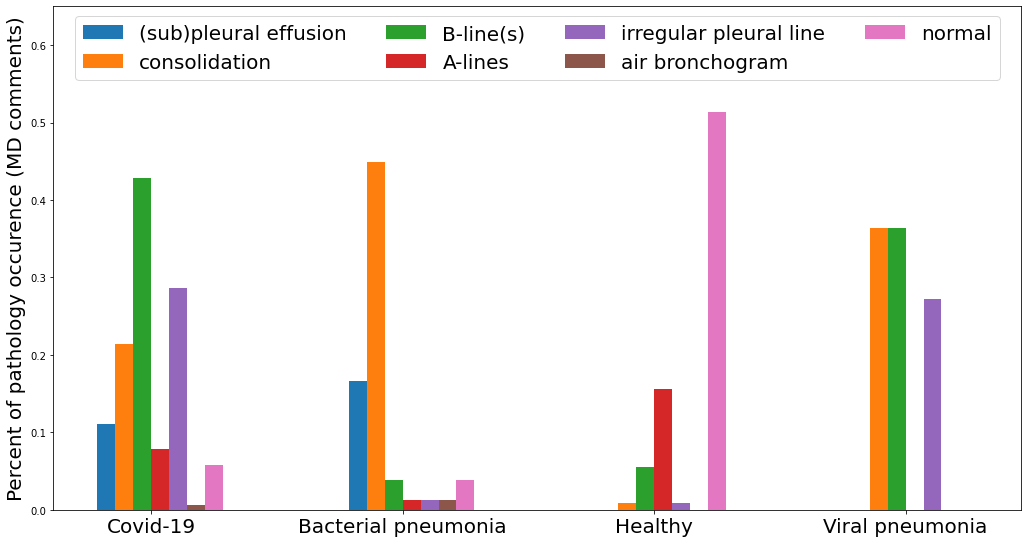

In [51]:
  # the label locations
width = 0.5  # the width of the bars
num = len(found_pattern)
x = np.arange(4)

fig, ax = plt.subplots(figsize=(15,8))

rects = list()
for i in range(num):
    rect = ax.bar(x - width/2 + (i+1)*width/num, overview[found_pattern[i]].values, width/num, label=found_pattern[i])
    rects.append(rect)
# rects2 = ax.bar(x + width/4, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of pathology occurence (MD comments)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(["Covid-19", "Bacterial pneumonia", "Healthy", "Viral pneumonia"], fontsize=20)
ax.legend(fontsize=20, loc="upper center", ncol=4)
ax.set_ylim(0,0.65)


fig.tight_layout()
plt.savefig("../../data/pathologies.pdf")
plt.show()

In [53]:
data_vids = data[data["Type"]=="video"]

In [57]:
np.mean(data_vids["Length (frames)"]), np.std(data_vids["Length (frames)"])

(159.64728682170542, 144.3462259906886)